In [1]:
from LZGraphs import NDPLZGraph

import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
from tqdm.notebook import tqdm
mpl.rcParams['figure.figsize'] = (15,7)
import numpy as np

/home/thomas/Desktop/LZGraphs/.venv/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


# The Data Used

The NDPLZGraph works on nucleotide sequences and is best suited repertoire analysis and inference,LZPgen prediction and sequence generation on the nucleotide level.
The nodes in the graph encode the nucleotide LZ sub-pattern together with the reading frame and the position of the sub-pattern in the sequence.
The reuslting graph gurantees it satisfies the DAG constraint.

In our example we will use the V and J calls for the sake of some of the examples.
Keep in mind those are not mandatory and can be left out, the only benifit one can achive by including the V and J calls is the inference of those calls in the some of the inference methods shown below.

first we will load the sequence we will use from out example datasets:

In [2]:
example_sequences = pd.read_csv('ExampleData2.csv',
                               index_col=0)
example_sequences

,cdr3_rearrangement,V,J
24735,TGTGCCTGCGTAACACAGGGGGTTTGGTATGGCTACACCTTC,TRBV30-1*01,TRBJ1-2*01
8790,TGTGCCAGTAGCCCTAACAGATCTGGAAACACCATATATTTT,TRBV19-1*01,TRBJ1-3*01
2956,TGTGCCAGCAGTTTCTCCCCCCCCTACGAGCAGTACTTC,TRBV27-1*01,TRBJ2-7*01
20041,TGCGCCAGCAGCTTGGCCGTGAACTACAACACCGGGGAGCTGTTTTTT,TRBV5-1*01,TRBJ2-2*01
3144,TGTGCCAGCAGCTCGCAGGGTCTCTCCTACGAGCAGTACTTC,TRBV7-9*01,TRBJ2-7*01
...,...,...,...
16997,TGTGCCAGCAGTTTAGCGGGACAGGCGGGTTACACTGAAGCTTTCTTT,TRBV28-1*01,TRBJ1-1*01
16636,TGTGCCAGCAGCTTAGGGACAGGGGTTCAACAGCCCCAGCATTTT,TRBV7-3*01,TRBJ1-5*01
8839,TGTGCCAGCGCCCGGACGGGGGGGGGTAACTATGGCTACACCTTC,TRBV25-1*01,TRBJ1-2*01
12247,TGCGCCAGCAGCCAACGGACAGGGCGCGAGCAGTACTTC,TRBV4-3*01,TRBJ2-7*01


# Creating The NDPLZGraph

In order to create an instance of a NDPLZGraph all we need is to provide the class constructor either a list of sequence or a DataFrame matching the column naming convention as in `ExampleData2.csv` 

Below is an example of the graph creation:

In [3]:
my_ndp_lzgraph = NDPLZGraph(example_sequences)

We can see from the verbose generated the amount of time it took to create the graph and the different steps taken along the way.

A good sanity check that the graph creation was indeed correct and that we accidentally didnt pass the name of the column by mistake or any other non sequence strings is to check the list of edges in the graph, see example below: 

In [4]:
len(my_ndp_lzgraph.edges) 

20587

We can see above that over the 5000 sequences we had in our example file we have discovered 20587 unique edges which means no issues on your side.
One should double check if he get less than 30 edges for any number of sequences larger than 30.

# Using The NDPLZGraph

### 1. Deriving a Featrure Vector

Keep in mind that the feature vector derived for an NDPLZGraph is based on the spesific nodes discoverd when processing the given repertoire and some of fraction of those nodes will be unique for that repertoire, which means those feature will not exist in other repertoires.

One can overcome this by either taking the union of feature vector keys (the feature vector is returned as a dictionary) and using only the intersection of all the features vectors keys.

Another option is to examine the only the unique features from each repetoire.

To derive a feature vector for a single repertoire one should follow the below example

In [5]:
feature_vector = my_ndp_lzgraph.eigenvector_centrality()

In [6]:
type(feature_vector)

dict

The eigenvector_centrality method will return the eigenvector centrality value for each node in your NDPLZGraph, the output is a dictionary, to further use this feature vector you would want to extract the values of the output dictionary and convert it to a numpy array:

In [7]:
list(feature_vector)[10:15]

['GG2_19', 'GGG1_22', 'TT1_24', 'TGG0_27', 'TA0_29']

In [8]:
feature_vector = np.array(list(feature_vector.values()))

In [9]:
feature_vector

array([2.64438751e-38, 1.52021870e-35, 1.78290721e-33, ...,
       3.71737727e-25, 2.78907293e-10, 1.06908203e-24], shape=(3518,))

### 2. Deriving LZPgen

Below is an example of how one can derive the LZPgen based on the NDPLZGraph.

In [10]:
lzpgens = []
# iterate over each sequence
for sequence in example_sequences['cdr3_rearrangement']:
    # convert sequence to graph sub-patterns
    walk = NDPLZGraph.encode_sequence(sequence)
    # calculate the lzpgen based on the fitted NaiveLZGraph
    lzpgen = my_ndp_lzgraph.walk_probability(walk,verbose=False)
    lzpgens.append(lzpgen)

Text(0.5, 0, '-log10(NDPLZPgen)')

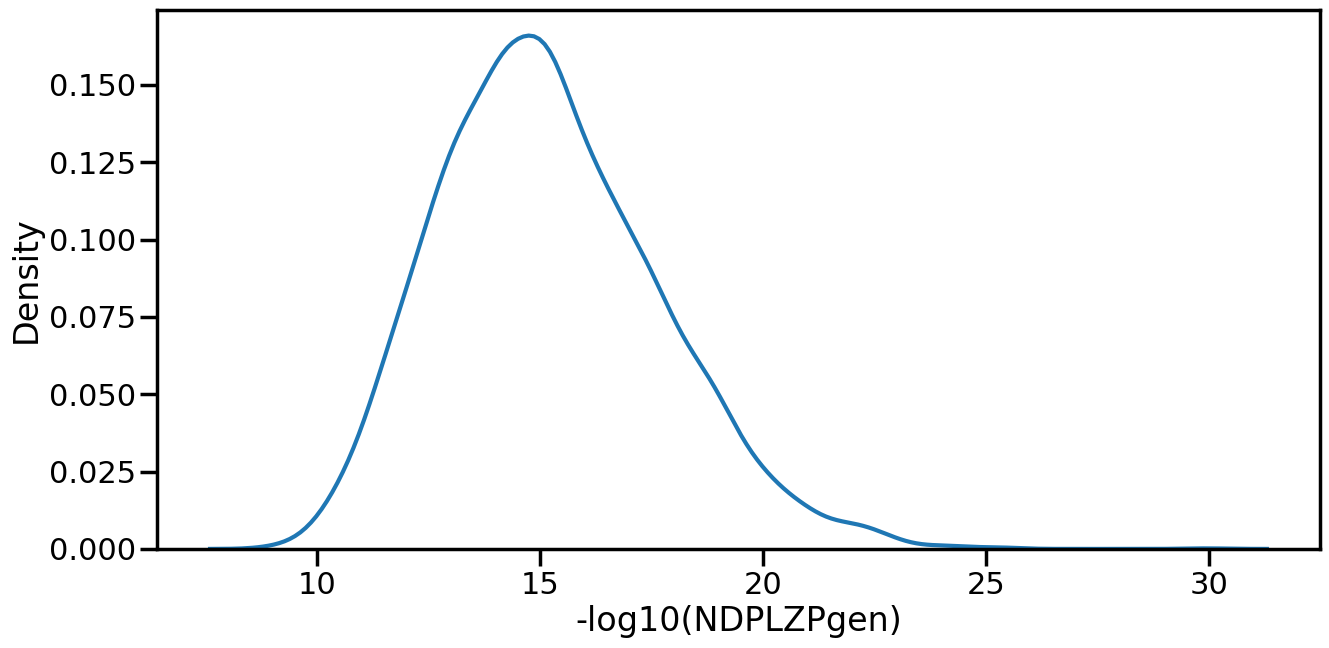

In [11]:
sns.kdeplot(-np.log10(lzpgens))
plt.xlabel('-log10(NDPLZPgen)')

### 3. Generating Sequences

Below is an example of how one can generate new sequences using the NDPLZGraph.

In [12]:
my_ndp_lzgraph.unsupervised_random_walk()

(['T0_1',
  'G1_2',
  'TG2_4',
  'C1_5',
  'CA2_7',
  'GT1_9',
  'A0_10',
  'GCC1_13',
  'CC1_15',
  'A0_16',
  'CCC1_19',
  'CT1_21',
  'CTT0_24',
  'GGC0_27',
  'TC0_29',
  'CT2_31',
  'ACA1_34',
  'CC1_36',
  'CAG0_39',
  'TA0_41',
  'CAC2_44',
  'CAT2_47',
  'AT2_49',
  'ATT1_52',
  'TT1_54'],
 'TGTGCCAGTAGCCCCACCCCTCTTGGCTCCTACACCCAGTACACCATATATTTT')

The above call to the `unsupervised_random_walk` method will generate a sequence starting in a random initial state and will terminate at a teminal state based on the procedure described in the paper.
The method returns the steps taken (the actual graph nodes) and the resulting sequence.

In [13]:
my_ndp_lzgraph.random_walk(initial_state='T0_1')

['T0_1',
 'G1_2',
 'TG2_4',
 'C1_5',
 'CA2_7',
 'GG1_9',
 'GGC0_12',
 'CC0_14',
 'GA2_16',
 'CTA1_19',
 'TGG1_22',
 'CT1_24',
 'AG0_26',
 'CGGG2_30',
 'GA0_32',
 'AG2_34',
 'CTT1_37',
 'TCT1_40',
 'TC1_42',
 'TT0_44',
 'T2_45']

One can also use the `random_walk` in order to specify the initial_state of the walk 

In [14]:
my_ndp_lzgraph.gene_random_walk(seq_len='unsupervised')

(['T0_1',
  'G1_2',
  'C2_3',
  'GC0_5',
  'CA2_7',
  'GCA1_10',
  'GCC1_13',
  'A1_14',
  'TC2_16',
  'TA1_18',
  'GCGG0_22',
  'GG1_24',
  'GA0_26',
  'AG2_28',
  'AT1_30',
  'AC0_32',
  'GCAG2_36',
  'TA0_38',
  'TT2_40',
  'TT1_42'],
 'TRBV5-1*01',
 'TRBJ2-3*01')

The `gene_random_walk` method will take a sequence length (make sure is modulo 3) or "unsupervised" and will generate a sequence that has evidenece for the same V and J allele.
The V and J allele will be randomly selected before the sequence is generated based on the marignal probabilites inferend by the graph, one can access them as in the next example:

In [15]:
my_ndp_lzgraph.marginal_vgenes

V
TRBV19-1*01    0.0802
TRBV7-2*01     0.0718
TRBV5-1*01     0.0632
TRBV7-9*01     0.0622
TRBV18-1*01    0.0512
TRBV2-1*01     0.0502
TRBV9-1*01     0.0462
TRBV4-3*01     0.0426
TRBV6-5*01     0.0406
TRBV27-1*01    0.0388
TRBV5-4*01     0.0340
TRBV30-1*01    0.0324
TRBV6-1*01     0.0302
TRBV4-1*01     0.0294
TRBV10-3*01    0.0274
TRBV6-6*01     0.0260
TRBV29-1*01    0.0258
TRBV5-6*01     0.0252
TRBV7-8*01     0.0216
TRBV30-1*02    0.0184
TRBV5-5*01     0.0162
TRBV15-1*01    0.0152
TRBV11-2*02    0.0144
TRBV28-1*01    0.0124
TRBV4-2*01     0.0118
TRBV25-1*01    0.0114
TRBV14-1*01    0.0110
TRBV11-3*01    0.0100
TRBV7-3*01     0.0100
TRBV5-8*01     0.0094
TRBV7-6*01     0.0072
TRBV6-4*01     0.0066
TRBV13-1*01    0.0064
TRBV10-1*01    0.0058
TRBV21-1*01    0.0058
TRBV12-5*01    0.0050
TRBV10-2*01    0.0048
TRBV20-1*01    0.0040
TRBV23-1*01    0.0032
TRBV7-7*01     0.0026
TRBV11-1*01    0.0026
TRBV7-3*02     0.0016
TRBV16-1*01    0.0012
TRBV12-2*01    0.0012
TRBV7-4*01     0.0008
TRBV6-7*

In [16]:
my_ndp_lzgraph.marginal_jgenes

J
TRBJ1-2*01    0.1634
TRBJ1-1*01    0.1424
TRBJ2-7*01    0.1362
TRBJ2-3*01    0.0898
TRBJ2-1*01    0.0860
TRBJ1-5*01    0.0766
TRBJ2-5*01    0.0758
TRBJ2-2*01    0.0614
TRBJ1-4*01    0.0536
TRBJ1-6*01    0.0448
TRBJ1-3*01    0.0428
TRBJ2-6*01    0.0168
TRBJ2-4*01    0.0104
Name: proportion, dtype: float64

### 4. Different Graph Attributes and Repertoire Attributes

Below is an example how one can access the `lengths` attribute of the NDPLZGraph to see what sequence lengths were observed while constucting the graph

In [17]:
my_ndp_lzgraph.lengths

{42: 1143,
 39: 772,
 48: 723,
 33: 122,
 51: 355,
 45: 1310,
 36: 277,
 54: 171,
 57: 68,
 60: 30,
 21: 1,
 30: 14,
 66: 2,
 63: 11,
 27: 1}

Below is an example of how one can inspect all the uniques initial state observed while constructing the graph

In [18]:
my_ndp_lzgraph.initial_states

T0_1    4991
C0_1       8
dtype: int64

Below is an example of how one can inspect all the unique terminal states observed while constructing the graph

In [19]:
my_ndp_lzgraph.terminal_states

TTC0_42      44
TT1_42      208
C2_39       184
T2_48       136
C2_42       316
           ... 
T2_63         1
CTTC2_36      1
TTTT2_48      1
CTTC2_57      1
CTTC2_60      1
Length: 83, dtype: int64

### 4. Calculating the K1000 Index

Below is an example how one can calculate the K1000 index for a repertoire.

In [22]:
from LZGraphs import K1000_Diversity    

k1000 = K1000_Diversity(list_of_sequences = example_sequences['cdr3_rearrangement'].to_list(),
                    lzgraph_encoding_function= 'ndp',
                    draws=50)

print('K1000 Index: ',k1000)

K1000 Index:  2142.96


### 5. Plotting Graph Related Features


#### 5.1. Ancestors Descendants Curves Plot
In this chart you can examine at each sub-pattern of a given sequence the amount descendants nodes reachable at each node contained in your sequence, as well as the amount of ancestors at each node. Sequence with different attribute differ both by the slope and the convergence rate of these curve as well as by the intersection point between the curves.

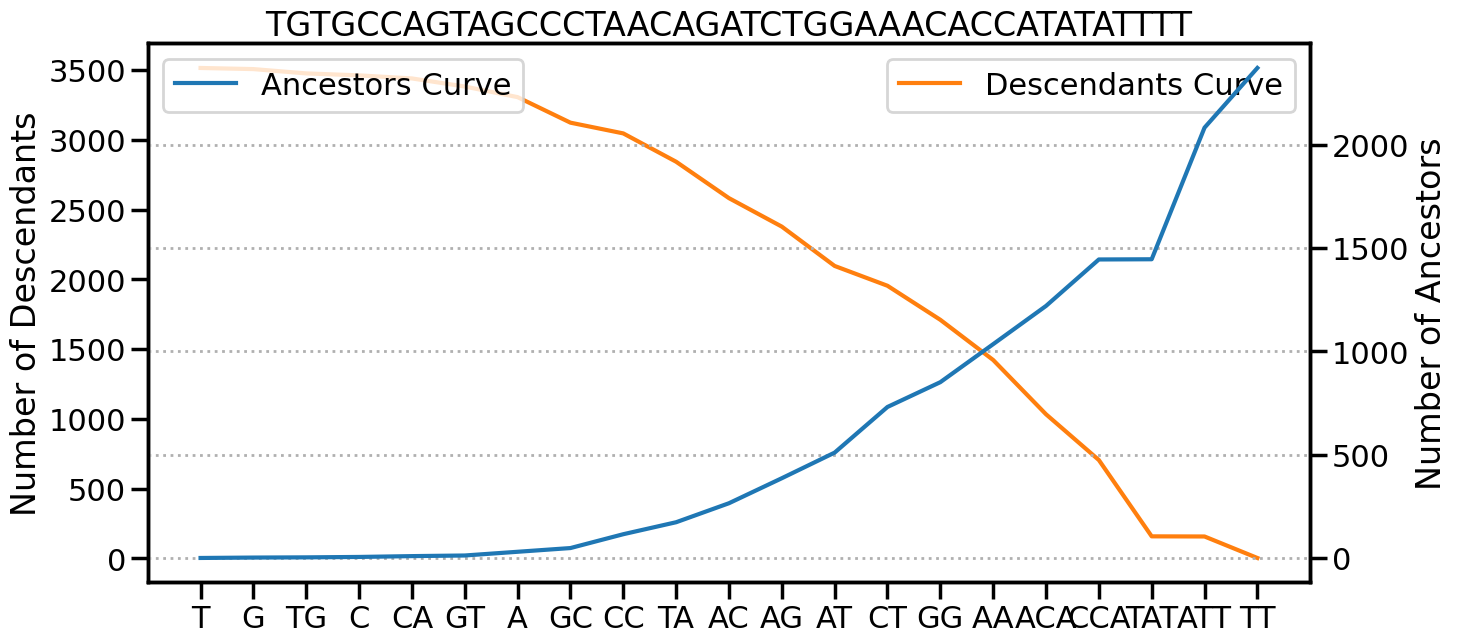

In [24]:
from LZGraphs.Visualization.Visualize import ancestors_descendants_curves_plot
sequence = 'TGTGCCAGTAGCCCTAACAGATCTGGAAACACCATATATTTT'
ancestors_descendants_curves_plot(my_ndp_lzgraph,sequence)

#### 5.2. Sequence Possible Paths Plot
In this chart we look at a reduced and immediate version of Descendants curve. For each sub-pattern derived from a given sequence and based on an LZGraph, We can examine the number of alternatives there are at each node, this indicates the rarity of a sequence and is correlated with the difference from the mean Levenshtein distance of the repertoire as shown in the LZGraphs paper.

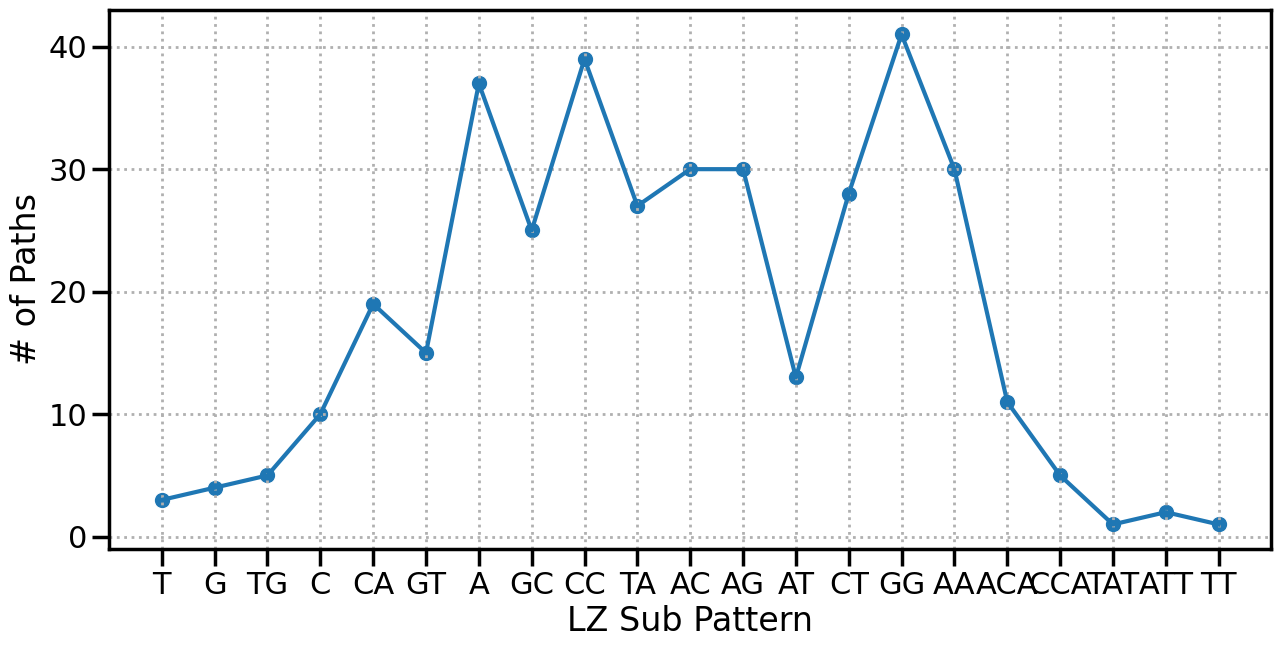

In [25]:
from LZGraphs.Visualization.Visualize import sequence_possible_paths_plot
sequence = 'TGTGCCAGTAGCCCTAACAGATCTGGAAACACCATATATTTT'
sequence_possible_paths_plot(my_ndp_lzgraph,sequence)

#### 5.3 Node Genomic Variability Plot
In this chart we look at the number of V and J genes/alleles per node in a given sequence with respect to a given repertoire. Not only can one infer the sub-patterns in a sequence that have the exceptional number of V and J alternatives but also when comparing between the same sequence in different repertoires (different LZGraphs) one can infer the amount difference at each sub-pattern between the two repertoires.

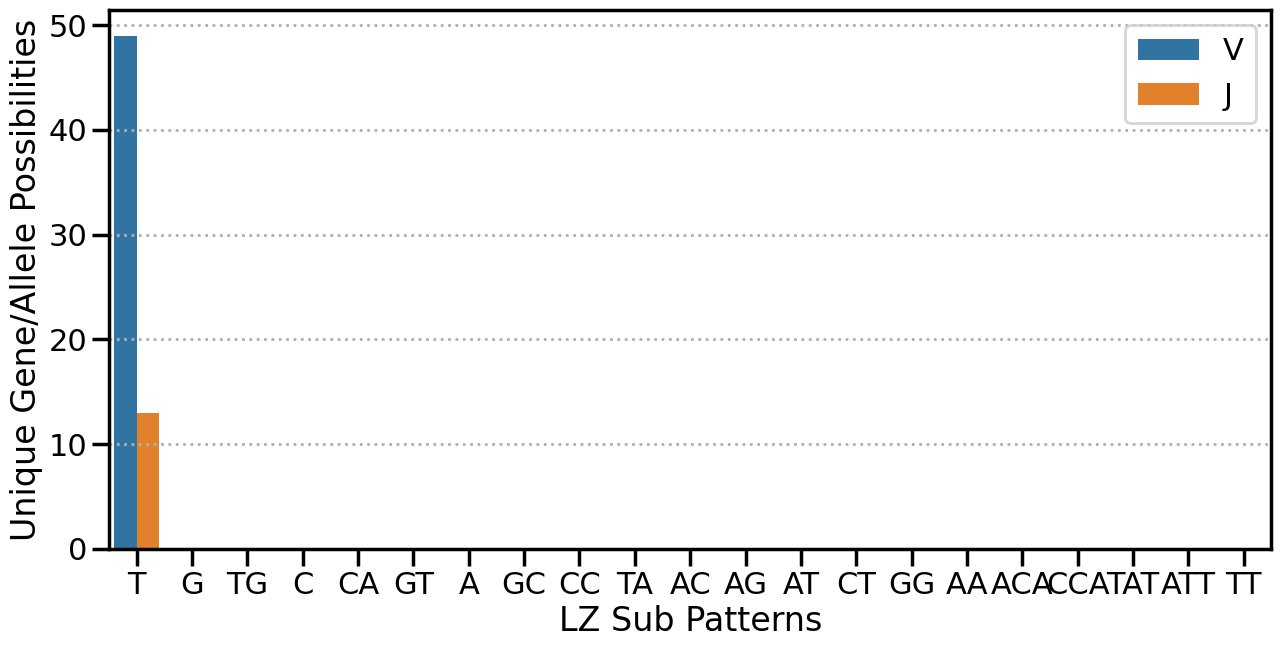

In [29]:
from LZGraphs.Visualization.Visualize import sequence_genomic_node_variability_plot
sequence = 'TGTGCCAGTAGCCCTAACAGATCTGGAAACACCATATATTTT'
sequence_genomic_node_variability_plot(my_ndp_lzgraph,sequence)

#### 5.4. Edge Genomic Variability Plot
In this chart we look at the number of V and J genes/alleles per edge in a given sequence with respect to a given repertoire.

* Allele/gene names colored in red signify that the allele/gene appeared in all the edges in the given sequence.
* Black cells signify that this spesific allele/gene wasnt observed at that edge.
* The color gradient at each cell represents the probability of choosing that edge under the constraint of having that specific V/J.

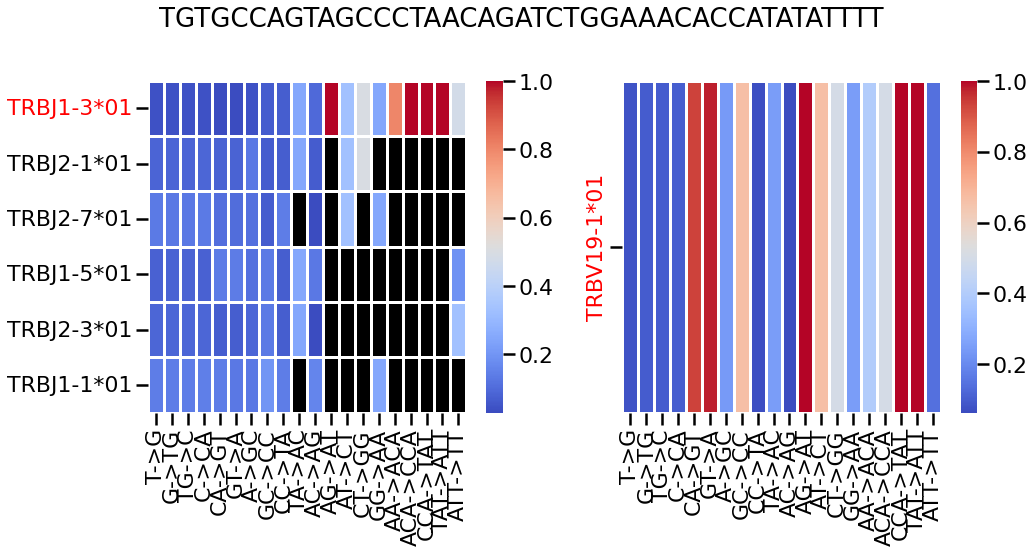

In [ ]:
from LZGraphs.LZGraphs.Visualization.Visualize import sequence_genomic_edges_variability_plot
sequence = 'TGTGCCAGTAGCCCTAACAGATCTGGAAACACCATATATTTT'
sequence_genomic_edges_variability_plot(my_ndp_lzgraph,sequence)

### 6. Graph Summary

The `graph_summary()` method provides a quick overview of your NDPLZGraph's key statistics:

In [ ]:
my_ndp_lzgraph.graph_summary()

### 7. Saving and Loading Graphs

Once you've built an NDPLZGraph, you can save it to disk for later use. This is useful for avoiding re-computation when working with large repertoires:

In [ ]:
# Save the graph to disk (pickle format)
my_ndp_lzgraph.save('my_ndp_lzgraph.pkl')

# Load the graph back
loaded_ndp_graph = NDPLZGraph.load('my_ndp_lzgraph.pkl')
print(f"Loaded graph has {len(loaded_ndp_graph.nodes)} nodes and {len(loaded_ndp_graph.edges)} edges")

### 8. Information-Theoretic Metrics

LZGraphs provides entropy-based metrics to analyze the diversity and complexity of your repertoire:

In [ ]:
from LZGraphs import node_entropy, edge_entropy, graph_entropy

# Calculate node entropy (diversity of nodes)
node_ent = node_entropy(my_ndp_lzgraph)
print(f"Node Entropy: {node_ent:.4f}")

# Calculate edge entropy (diversity of transitions)
edge_ent = edge_entropy(my_ndp_lzgraph)
print(f"Edge Entropy: {edge_ent:.4f}")

# Calculate graph entropy (combined measure)
graph_ent = graph_entropy(my_ndp_lzgraph)
print(f"Graph Entropy: {graph_ent:.4f}")

You can also calculate the perplexity of individual sequences, which measures how "surprising" a sequence is relative to the graph:

In [ ]:
from LZGraphs import sequence_perplexity

# Calculate perplexity for a single sequence
sample_seq = example_sequences['cdr3_rearrangement'].iloc[0]
perplexity = sequence_perplexity(my_ndp_lzgraph, sample_seq)
print(f"Sequence: {sample_seq}")
print(f"Perplexity: {perplexity:.4f}")

### 9. Comparing Two Repertoires

You can compare two repertoires using Jensen-Shannon divergence. This is useful for measuring similarity between different immune repertoires:

In [ ]:
from LZGraphs import jensen_shannon_divergence

# Create a second graph from a subset of sequences (simulating a different repertoire)
subset_sequences = example_sequences.iloc[:2500]
second_ndp_graph = NDPLZGraph(subset_sequences)

# Calculate Jensen-Shannon divergence between the two repertoires
js_divergence = jensen_shannon_divergence(my_ndp_lzgraph, second_ndp_graph)
print(f"Jensen-Shannon Divergence: {js_divergence:.6f}")
print("(Lower values indicate more similar repertoires)")

### 10. Error Handling

LZGraphs provides custom exceptions for clear error messages. Here are some common error scenarios and how to handle them:

In [ ]:
from LZGraphs.Exceptions import InvalidSequenceError, InvalidNodeError

# Example 1: Handling invalid sequences
try:
    # NDPLZGraph only accepts nucleotide sequences (A, T, G, C)
    invalid_seq = "INVALID123"
    walk = NDPLZGraph.encode_sequence(invalid_seq)
except Exception as e:
    print(f"Error type: {type(e).__name__}")
    print(f"Message: {e}")

print()

# Example 2: Handling unknown nodes in walk probability
try:
    # Create an invalid walk with nodes not in the graph
    unknown_walk = ['UNKNOWN_NODE_1', 'UNKNOWN_NODE_2']
    my_ndp_lzgraph.walk_probability(unknown_walk, verbose=False)
except InvalidNodeError as e:
    print(f"Error type: {type(e).__name__}")
    print(f"Message: {e}")

### Cleanup

Remove temporary files created during this tutorial:

In [ ]:
import os
# Remove saved graph file
if os.path.exists('my_ndp_lzgraph.pkl'):
    os.remove('my_ndp_lzgraph.pkl')
    print("Cleaned up temporary files.")